# M.Taufiq Qurahman 
# 09011381722092

# Implementasi Neural Network dalam mendeteksi Quality Anggur

Pada kasus program yang saya buat ini merupakan dari kasus kualitas anggur putih atau minuman yang menggandung sari anggur anggur putih, dataset yang saya dapatkan dari sebuah website UCI dan di dalam UCI tersebut terdapat dua dataset terkait dengan varian anggur merah dan putih dari anggur "Vinho Verde". "Vinho Verde merupakan perusahaan produksi angggur terbesar di Portugis". Karena masalah privasi dan logistik Vinho Verde, hanya menyediakan data yang tersusun dari beberapa variabel fisikokimia yang menetukan (input) dan 1 sensorik (output) yang tersedia kekurangan dari dataset ini tidak menapilkan merek dari data tentang jenis anggur, merek anggur, harga jual anggur, dll.

Kumpulan data ini dapat dilihat klasifikasi atau regresi. Kelas-kelas tersebut tidak seimbang (misalnya ada lebih banyak anggur normal daripada yang sangat baik atau yang buruk). Algoritma deteksi pendeteksian dapat digunakan untuk mendeteksi beberapa anggur yang sangat baik atau buruk.

# 1. Import Library

Langkah pertama yang kita lakukan sebelum menjalankan programnya kita terlebih dahulu melakukan Import Library, library disini adalah kumpulan code yang biasanya terkumpul dalam sebuah namespace/ module/ package yang dapat di import kedalam program lain.

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils.np_utils import to_categorical
import seaborn as sns

Library yang di pakai ialah yang telah tertera pada line diatas, diantaranya :
* Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
* Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
* Library Sklearn 
digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
* Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
* Library Seaborn
sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi dataset

# 2. import Dataset

Memasukkan dataset. dataset yang dipakai adalah dataset "winequalityN" yang sudah tersusun dalam kondisi berformat .csv dan didalam terdapat sekumpulan angka dan huruf, dimana huruf tidak bisa diproses oleh python dan harus diganti dengan angka dan menetukan X dan Y, dimana X merupakan inputtan yang akan di proses dan Y merupakan Class atau ouput yang akan di tamplikan.

pada dataset ini memiliki 13 kolom dan 6464 baris dengan 12 kolom sebagai features dan 1 kolom (quality) sebagai label yang memiliki varian nilai kualitas dari anggur dikarenakan dataset ini adalah dataset multiclass

In [57]:
dataset=pd.read_csv("winequalityN.csv", delimiter=",")
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 3. Mengecek data kosong

agar program yang dijalankan dan hasilnya tidak melenceng jauh dari perkiraan, perlu dilakukan pengecekan data setealah dilakukan import dataset, pengecekan ini bertujuan untuk mengetahui apakah dari dataset yang dipakai terdapat data yang kosong.
untuk pengecekannya bisa dilakukan dengan menjalankan syntax berikut

In [58]:
dataset.isnull().any().sum()

0

# 4. Visualisasi data

Untuk mengetahui berapa banyak persebaran data terhadap nilai kualitas anggur maka kita perlu melakukan visualisasi data agar lebih muda dipahami. Dengan bantuan library matplotlib dan seaborn seperti berikut ini

In [59]:
dataset.quality.value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

dari visualisasi diatas diketahui bahwa terdapat 7 nilai yang melambangkan kulitas dari anggur yang akan dijadikan sebagai bahan minuman, 7 nilai tersebut yaitu kualitas anggur dengan nilai 6 sebanyak 2820, kualitas anggur dengan nilai 5 sebanyak 2128, kualitas anggur dengan nilai 7 sebanyak 1074, kualitas anggur dengan nilai 4 sebanyak 214, kualitas anggur dengan nilai 8 sebanyak 192, kualitas anggur dengan nilai 3 sebanyak 30, dan kualitas anggur dengan nilai 9 sebanyak 5.

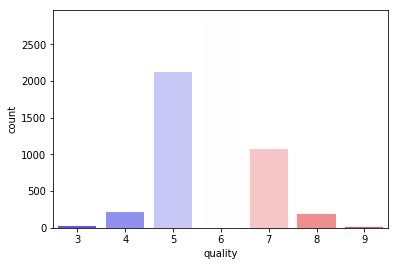

In [60]:
sns.countplot(x="quality", data=dataset, palette="bwr")
plt.show()

grafik batang diatas merupakan visualisasi perbandingan dari nilai kualitas anggur

# 5. Menentukan Features dan Labels

disini saya menentukan feature dan label, dimana feature dimulai dari kolom 0 sampai 12 sedankan label pada kolom terakhir yaitu kolom 13

In [61]:
features = dataset.iloc[:,0:12].values
labels = dataset.iloc [:,12].values

# 6. Normalisasi

untuk normalisasi datanya saya menggunakan metode MinMaxScaler, dikarenakan dataset yang saya pakai merupakan dataset multiclass disini saya juga menambahkan t_categorical yang berfungsi untuk mengkonversi beberapa data class yang telah ditentukan menjadi data yang dapat dikelompokkan

In [62]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
features_scale = scaler.fit_transform(features)

In [63]:
labels_categorical = to_categorical(labels)
labels_categorical.shape

(6463, 10)

# 7. Splitting dan Modelling 

Pada tahap ini saya membuat file test berukuran 20 % dari jumlah keseluruhan data yang tersedia dan 80% sisanya sebagai file training  

In [64]:
training_data, testing_data, training_label, testing_label = train_test_split(features_scale,labels_categorical , test_size=0.2, shuffle=True, stratify=labels)

pada tahap pembuatan model dibawah ini, saya membuat 1 layer input sebanyak 100 neuron dan terdapat 2 hidden layer dan masing masing layer memiliki 50 neuron, pada 1 layer terakhir terdapat 10 neuron sebagai output kategori

In [65]:
model = Sequential()
model.add(Dense(units= 100, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

In [66]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=20, epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 5170 samples, validate on 1293 samples
Epoch 1/100
5170/5170 [==============================] - 2s 312us/step - loss: 0.2589 - accuracy: 0.8921 - val_loss: 0.1966 - val_accuracy: 0.9064
Epoch 2/100
5170/5170 [==============================] - 1s 157us/step - loss: 0.1929 - accuracy: 0.9027 - val_loss: 0.1875 - val_accuracy: 0.9063
Epoch 3/100
5170/5170 [==============================] - 1s 158us/step - loss: 0.1880 - accuracy: 0.9048 - val_loss: 0.1881 - val_accuracy: 0.9049
Epoch 4/100
5170/5170 [==============================] - 1s 157us/step - loss: 0.1861 - accuracy: 0.9061 - val_loss: 0.1849 - val_accuracy: 0.9085
Epoch 5/100
5170/5170 [==============================] - 1s 167us/step - loss: 0.1846 - accuracy: 0.9069 - val_loss: 0.1839 - val_accuracy: 0.9067
Epoch 6/100
5170/5170 [==============================] - 1s 167us/step - loss: 0.1833 - accuracy: 0.9086 - val_loss: 0.1824 - val_accuracy: 0.9082
Epoch 7/100
5170/5170 [==============================] - 1s 163us/step

Epoch 56/100
5170/5170 [==============================] - 2s 311us/step - loss: 0.1658 - accuracy: 0.9199 - val_loss: 0.1740 - val_accuracy: 0.9152
Epoch 57/100
5170/5170 [==============================] - 2s 291us/step - loss: 0.1654 - accuracy: 0.9197 - val_loss: 0.1737 - val_accuracy: 0.9181
Epoch 58/100
5170/5170 [==============================] - 1s 168us/step - loss: 0.1656 - accuracy: 0.9197 - val_loss: 0.1756 - val_accuracy: 0.9131
Epoch 59/100
5170/5170 [==============================] - 1s 256us/step - loss: 0.1656 - accuracy: 0.9193 - val_loss: 0.1757 - val_accuracy: 0.9136
Epoch 60/100
5170/5170 [==============================] - 1s 147us/step - loss: 0.1650 - accuracy: 0.9211 - val_loss: 0.1735 - val_accuracy: 0.9176
Epoch 61/100
5170/5170 [==============================] - 1s 149us/step - loss: 0.1650 - accuracy: 0.9196 - val_loss: 0.1744 - val_accuracy: 0.9165
Epoch 62/100
5170/5170 [==============================] - 1s 149us/step - loss: 0.1644 - accuracy: 0.9202 - val_

In [67]:
print('accuracy {}'.format(acc_testing[1]))

accuracy 0.9175559878349304


In [68]:
persentase = acc_testing
print("%s : %.2f%%" % (model.metrics_names[1],persentase[1]*100))

accuracy : 91.76%


In [69]:
acc_training.history

{'val_loss': [0.1966495480034025,
  0.18753101383404314,
  0.18811863529433231,
  0.18490446500094104,
  0.18385908311868213,
  0.1823901100414074,
  0.1809186779498501,
  0.18110203795993596,
  0.17907554210845758,
  0.1790551352044546,
  0.17932312628463176,
  0.1788983783653699,
  0.17876812845629864,
  0.17876398074746777,
  0.17764041580300136,
  0.17952281228581418,
  0.17674093597265333,
  0.17832701561622444,
  0.1763394657761573,
  0.17671471457332028,
  0.17741542810261574,
  0.17644678584061568,
  0.1755415090782552,
  0.17690695671268147,
  0.17749174484336275,
  0.17979772145768422,
  0.17548429435846516,
  0.17719235914858017,
  0.17692570397536697,
  0.175050327184121,
  0.17612373316048285,
  0.17626736876075802,
  0.17707585388389743,
  0.1748438675737344,
  0.17601942568902165,
  0.17693360606230052,
  0.17449441813768016,
  0.17589343975932673,
  0.17577833888010747,
  0.17637271697403198,
  0.17476804128056428,
  0.17444103143746229,
  0.17434802502739458,
  0.17400

# 8. Plotting Model Akurasi dan Loss Akurasi

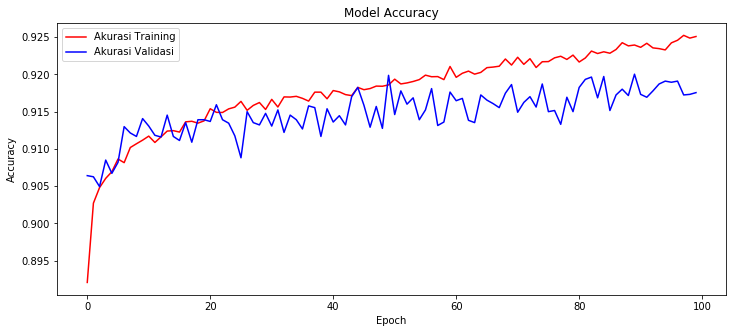

In [70]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

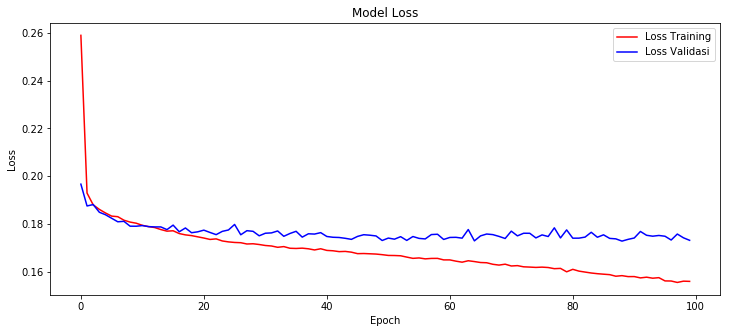

In [71]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

# 9. Evaluate Model
Menampilkan hasil dari akurasi dataset kualitas anggur dari banyaknya epoch 100

In [72]:
predict = model.predict(features)

In [73]:
scores = model.evaluate(features, labels_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6463/6463 [==============================] - 0s 37us/step

accuracy: 92.55%


Setelah mendapatkan hasil akurasis, selanjutnya dapat dilakukan analisis performance dengan membuat confusion matrix dari labels yang telah diubah menjadi categorical dan nilai prediksi dari model neural network terhadap features yang telah di preprocessing.

# 10. Matriks Confusion
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_categorical.argmax (axis=1), predict.argmax(axis=1))

In [75]:
cm

array([[  10,    1,   10,    9,    0,    0,    0],
       [   2,   38,  123,   49,    2,    0,    0],
       [   4,   12, 1481,  611,   19,    1,    0],
       [   2,    4,  583, 2006,  225,    0,    0],
       [   0,    0,   28,  603,  435,    8,    0],
       [   0,    0,    4,   88,   92,    8,    0],
       [   0,    0,    0,    2,    3,    0,    0]], dtype=int64)

In [76]:
accuracy=((10+38+1481+2006+435+8+0)/(10+1+10+9+0+0+0+2+38+123+49+2+0+0+4+12+1481+611+19+1+0+2+4+583+2006+225+0+0+0+0+28+603+435+8+0+0+0+4+88+92+8+0+0+0+0+2+3+0+0))*100

In [77]:
accuracy

61.55036360823147

# Referensi
Paper : Classifiation of Wine With Artificial Neural Network
        https://pdfs.semanticscholar.org/d951/feb47d8476c3b5ad3dbb0d46198b1660e19a.pdf
        
Dataset : winequalityN
          https://www.kaggle.com/rajyellow46/wine-quality